In [ ]:
# 1

In [1]:
import pandas as pd

In [5]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [11]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [13]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [15]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [17]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [21]:
user_data.nunique()

client     2954
premium       2
age          50
dtype: int64

In [23]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [27]:
# Сколько уникальных значений принимает переменная platform
logs.platform.nunique()

3

In [ ]:
# 2 Какой клиент совершил больше всего успешных операций?

In [31]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [41]:
success_count = logs.query('success == True').client.value_counts()
success_count

client
92584    41
36165    41
61473    41
28719    41
78349    41
         ..
31025     1
17815     1
81617     1
4318      1
51575     1
Name: count, Length: 2845, dtype: int64

In [43]:
max_success = success_count.max()
max_success

41

In [47]:
max_success_users = success_count.loc[success_count == max_success]
max_success_users

client
92584    41
36165    41
61473    41
28719    41
78349    41
82563    41
12179    41
52870    41
61468    41
Name: count, dtype: int64

In [51]:
max_success_users.index

Index([92584, 36165, 61473, 28719, 78349, 82563, 12179, 52870, 61468], dtype='int64', name='client')

In [58]:
max_success_users.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

In [ ]:
# 3. С какой платформы осуществляется наибольшее количество успешных операций?

In [60]:
# можно посмотреть через describe
logs['platform'].describe()

count      4500
unique        3
top       phone
freq       2753
Name: platform, dtype: object

In [68]:
# есть второй вариант реализации
logs.loc[logs.success == True].platform.value_counts().idxmax()

'phone'

In [ ]:
# 4. Какая платформа наиболее популярна среди премиумных клиентов?

In [82]:
premium_logs = logs.merge(user_data, on='client')
premium_logs.loc[premium_logs.success == True].platform.value_counts().idxmax()

'phone'

In [ ]:
# 5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), 
# используя библиотеку seaborn с параметрами цвета по умолчанию

In [86]:
import seaborn as sns

In [88]:
premium_logs

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


/var/folders/1_/mlhswh695nq8cdkhkw2ptmkw0000gn/T/ipykernel_57847/3422240361.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(premium_logs.loc[premium_logs.success == True].age)
/var/folders/1_/mlhswh695nq8cdkhkw2ptmkw0000gn/T/ipykernel_57847/3422240361.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

<Axes: xlabel='age', ylabel='Density'>

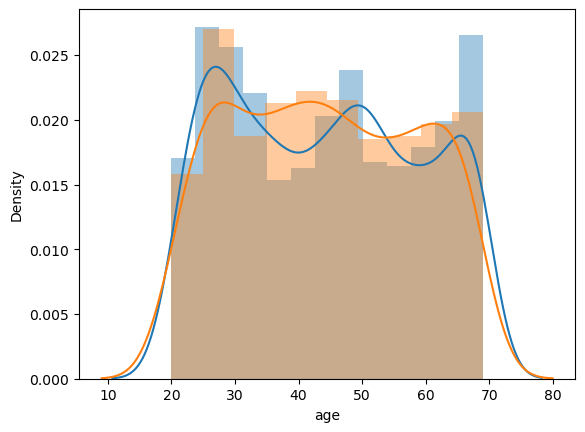

In [92]:
sns.distplot(premium_logs.loc[premium_logs.success == True].age)
sns.distplot(premium_logs.loc[premium_logs.success == False].age)

In [ ]:
# 7. Постройте график распределения числа успешных операций:

# · x – число успешных операций (successes)
# · y – число клиентов, совершивших столько успешных операций

In [94]:
success_count

client
92584    41
36165    41
61473    41
28719    41
78349    41
         ..
31025     1
17815     1
81617     1
4318      1
51575     1
Name: count, Length: 2845, dtype: int64

In [96]:
success_count = success_count.rename('successes')

<Axes: xlabel='successes', ylabel='count'>

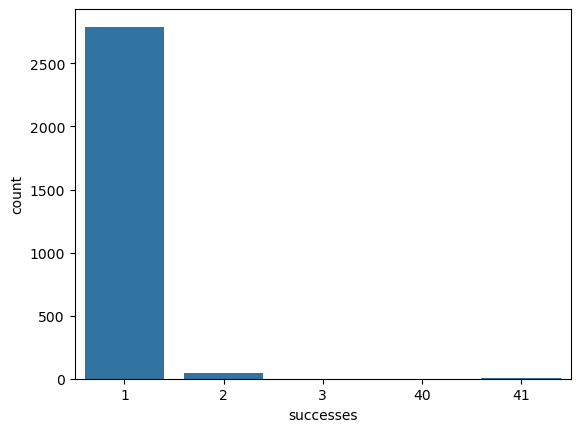

In [104]:
sns.countplot(x=success_count)

In [ ]:
# 8. 

In [106]:
import matplotlib.pyplot as plt

In [109]:
premium_logs

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


<Axes: xlabel='age', ylabel='count'>

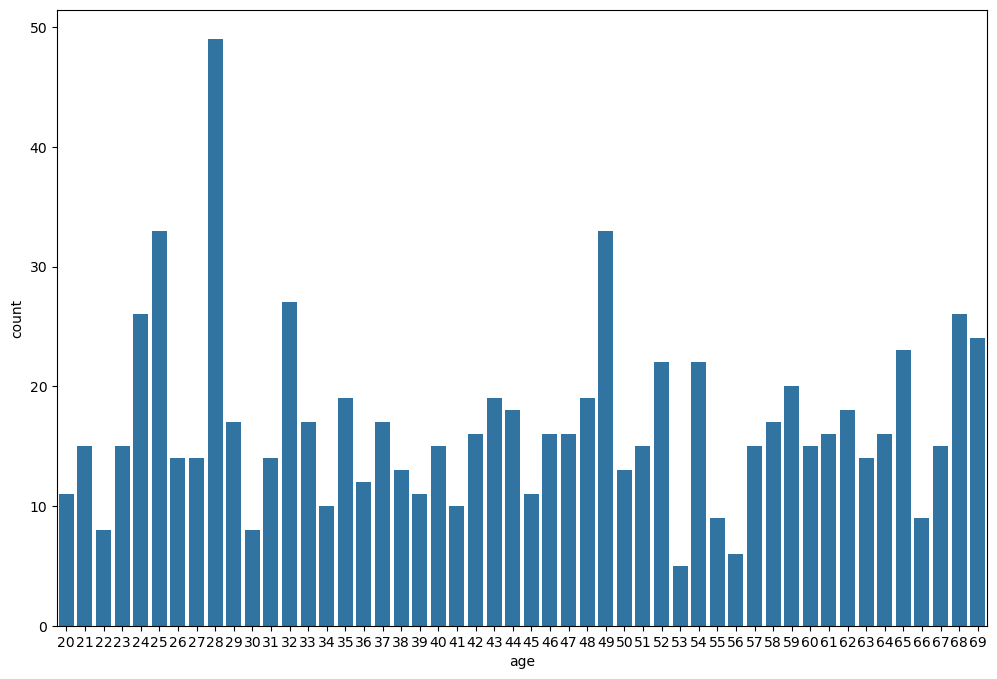

In [117]:
plt.figure(figsize=(12, 8))
sns.countplot(
    data=premium_logs.query("platform == 'computer' & success == True"),
    x='age'
)